In [1]:
import matplotlib.pyplot as plt

In [5]:
# C++ mean estimation times
cpp_mean_times = [69.65729010, 79.821177618, 92.500526834]
cpp_median_times = [80.400275131, 42.715981334, 71.307767361]
videos_cpp = ["ACET.mp4", "NYCJ.mp4", "toto.mp4"]

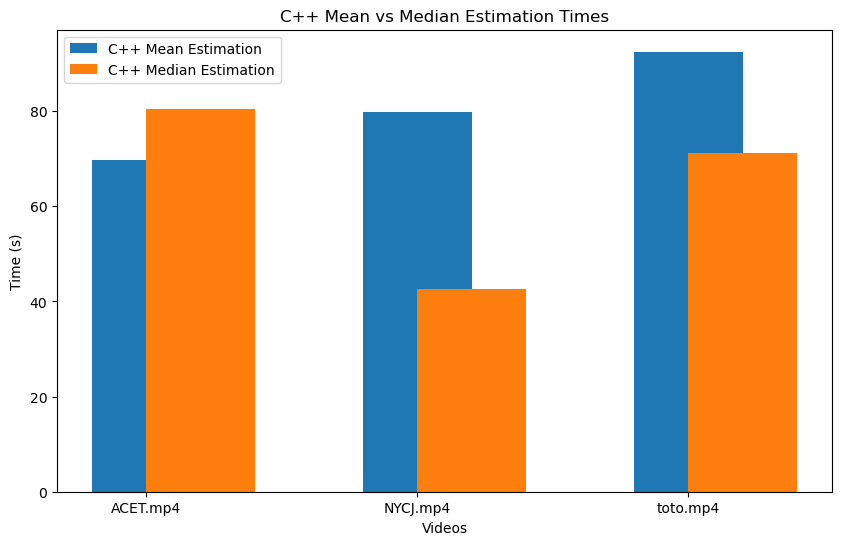

In [6]:
# Plotting for C++ implementations
plt.figure(figsize=(10, 6))
x = range(len(videos_cpp))
plt.bar(x, cpp_mean_times, width=0.4, label='C++ Mean Estimation', align='center')
plt.bar(x, cpp_median_times, width=0.4, label='C++ Median Estimation', align='edge')
plt.xlabel('Videos')
plt.ylabel('Time (s)')
plt.xticks(x, videos_cpp)
plt.title('C++ Mean vs Median Estimation Times')
plt.legend()

plt.show()

In [7]:
# CUDA non-opti and opti times and FPS
cuda_non_opti_times = [9.787684591, 16.778739135, 5.081195583, 6.188513133]
cuda_opti_times = [5.412173835, 9.487333870, 4.910466385, 4.016978061]
cuda_non_opti_fps = [28.31, 15.36, 71.51, 15.69]
cuda_opti_fps = [71.02, 34.02, 145.10, 37.30]
videos_cuda = ["ACET.mp4", "Kaaris.mp4", "NYCJ.mp4", "toto.mp4"]

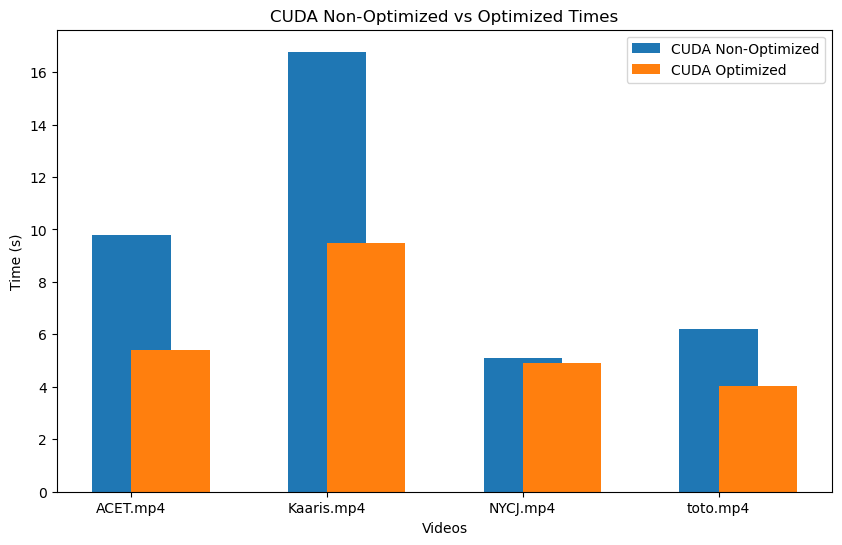

In [9]:
# Plotting for CUDA implementations
plt.figure(figsize=(10, 6))
x = range(len(videos_cuda))
plt.bar(x, cuda_non_opti_times, width=0.4, label='CUDA Non-Optimized', align='center')
plt.bar(x, cuda_opti_times, width=0.4, label='CUDA Optimized', align='edge')
plt.xlabel('Videos')
plt.ylabel('Time (s)')
plt.xticks(x, videos_cuda)
plt.title('CUDA Non-Optimized vs Optimized Times')
plt.legend()

plt.show()

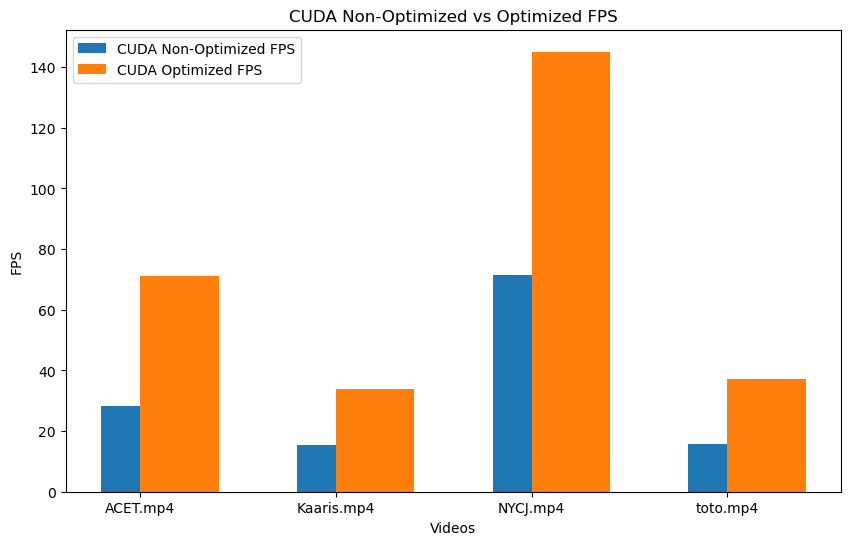

In [10]:
# Plotting for CUDA FPS
plt.figure(figsize=(10, 6))
plt.bar(x, cuda_non_opti_fps, width=0.4, label='CUDA Non-Optimized FPS', align='center')
plt.bar(x, cuda_opti_fps, width=0.4, label='CUDA Optimized FPS', align='edge')
plt.xlabel('Videos')
plt.ylabel('FPS')
plt.xticks(x, videos_cuda)
plt.title('CUDA Non-Optimized vs Optimized FPS')
plt.legend()

plt.show()

In [2]:
# Data for CUDA optimized and non-optimized versions
activities_opti = {
    "CUDA memcpy DtoH": 426.22,
    "CUDA memcpy HtoD": 234.17,
    "dilatation_kernel": 103.63,
    "erosion_kernel": 103.58,
    "convert_to_cielab": 101.72,
    "recompute_mean_background": 93.297,
    "compute_residual_image": 79.137,
    "hysteresis_threshold_kernel": 19.689,
    "apply_mask": 13.935,
    "ConvertNV12BLtoNV12": 9.0699,
    "CUDA memset": 0.20092,
    "MemsetD2D_BL": 0.089661
}

activities_non_opti = {
    "CUDA memcpy DtoH": 396.22,
    "CUDA memcpy HtoD": 301.80,
    "convert_to_cielab": 3801.07,
    "compute_residual_image": 1619.96,
    "recompute_mean_background": 93.712,
    "dilatation_kernel": 82.102,
    "erosion_kernel": 81.947,
    "hysteresis_threshold_kernel": 17.697,
    "apply_mask": 12.179,
    "ConvertNV12BLtoNV12": 8.9905,
    "CUDA memset": 0.19075,
    "MemsetD2D_BL": 0.091069
}

In [3]:
# Create lists for the plot
activities = list(activities_opti.keys())
times_opti = [activities_opti[activity] for activity in activities]
times_non_opti = [activities_non_opti[activity] for activity in activities]

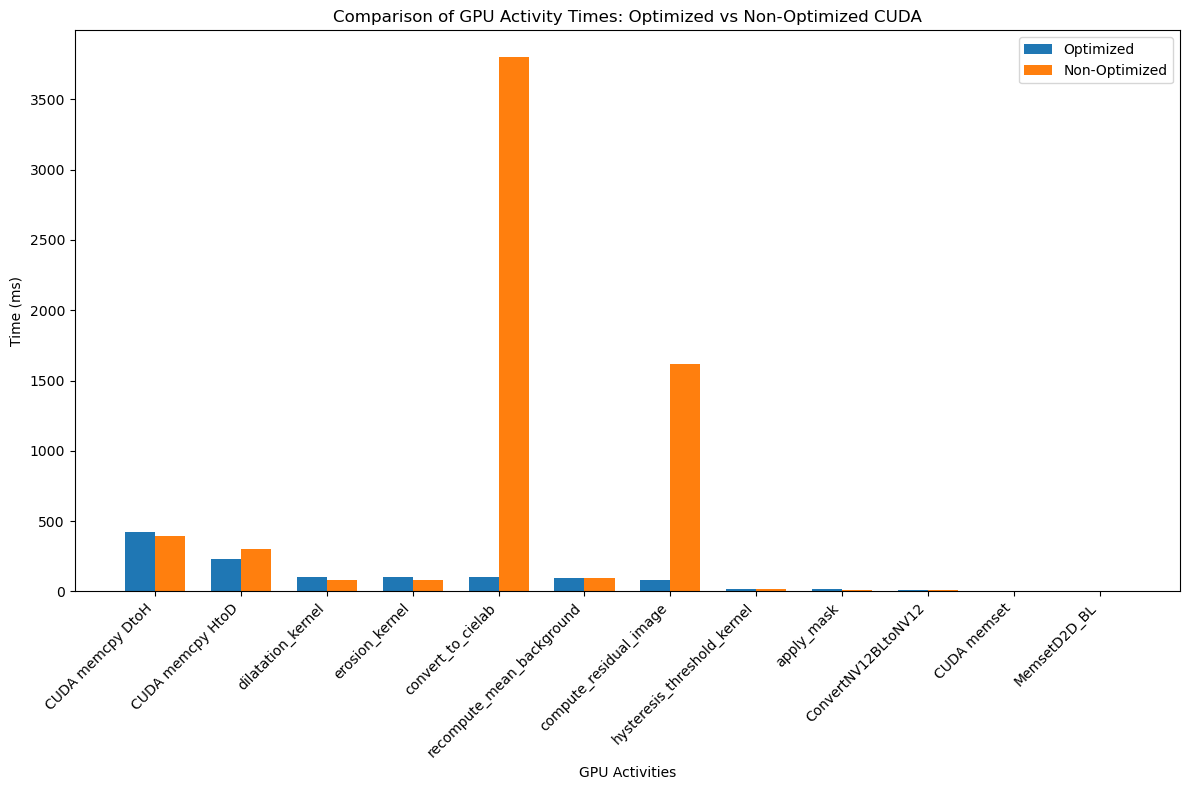

In [4]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = range(len(activities))

bar1 = ax.bar(index, times_opti, bar_width, label='Optimized')
bar2 = ax.bar([i + bar_width for i in index], times_non_opti, bar_width, label='Non-Optimized')

ax.set_xlabel('GPU Activities')
ax.set_ylabel('Time (ms)')
ax.set_title('Comparison of GPU Activity Times: Optimized vs Non-Optimized CUDA')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(activities, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()